In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

Epoch 1/10
466/466 [==============================] - 3s 4ms/step - loss: 0.0689 - accuracy: 0.9772 - val_loss: 0.0451 - val_accuracy: 0.9844
Epoch 2/10
466/466 [==============================] - 2s 4ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0186 - val_accuracy: 0.9928
Epoch 3/10
466/466 [==============================] - 2s 4ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0216 - val_accuracy: 0.9903
Epoch 4/10
466/466 [==============================] - 2s 5ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0136 - val_accuracy: 0.9960
Epoch 5/10
466/466 [==============================] - 3s 6ms/step - loss: 0.0057 - accuracy: 0.9979 - val_loss: 0.0251 - val_accuracy: 0.9938
Epoch 6/10
466/466 [==============================] - 2s 4ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0359 - val_accuracy: 0.9879
Epoch 7/10
466/466 [==============================] - 2s 4ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0210 - val_accuracy: 0.9933
Epoch 

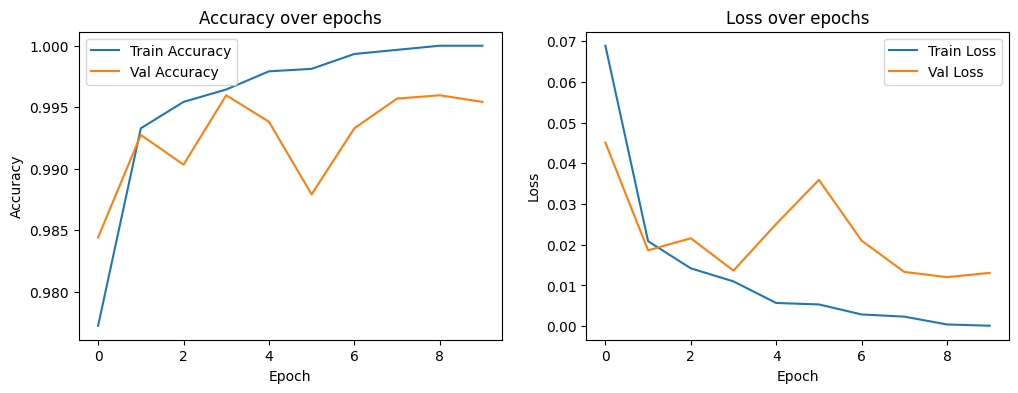

99/99 [==============================] - 0s 2ms/step


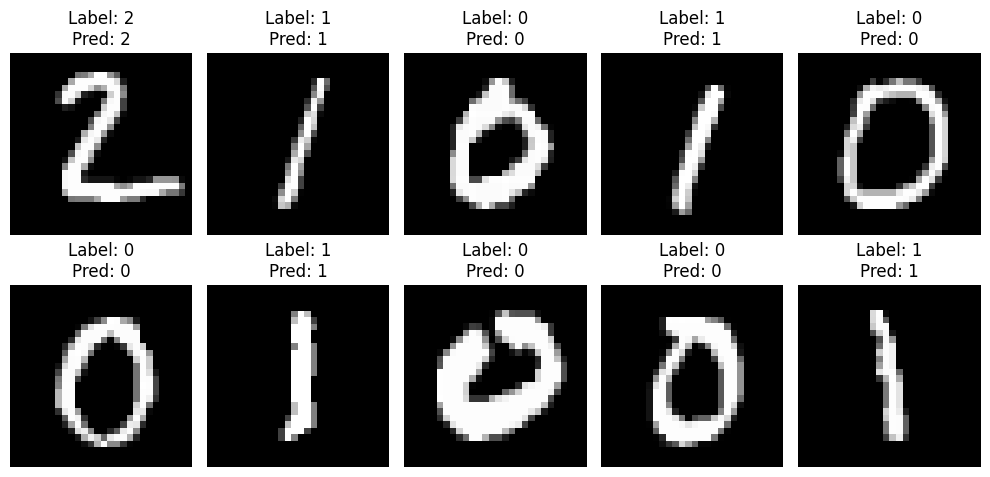

In [ ]:
import numpy as np
import cv2
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Download the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Step 2: Extract a subset of the data containing only digits 0, 1, and 2
train_filter = np.isin(train_labels, [0, 1, 2])
test_filter = np.isin(test_labels, [0, 1, 2])

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Step 3: Preprocess images by normalizing pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 3)
test_labels = to_categorical(test_labels, 3)

# Step 4: Build a neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the neural network with 10 epochs
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=32)

# Step 6: Evaluate the model and display accuracy and loss using matplotlib charts
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

plt.show()

# Step 7: Display some images and their predicted labels
def plot_images(images, labels, predictions, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {np.argmax(labels[i])}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Predict the labels for the test set
test_predictions = model.predict(test_images)

# Display 10 test images with their predicted labels
plot_images(test_images, test_labels, test_predictions)

# Step 8: Calculate Hu moments for each image
def calculate_hu_moments(images):
    hu_moments = []
    for img in images:
        img_uint8 = (img * 255).astype('uint8')
        moments = cv2.moments(img_uint8)
        hu_moments.append(cv2.HuMoments(moments).flatten())
    return np.array(hu_moments)

train_hu_moments = calculate_hu_moments(train_images)
test_hu_moments = calculate_hu_moments(test_images)

print("Hu Moments for the first training image:\n", train_hu_moments[0])
print("Hu Moments for the first test image:\n", test_hu_moments[0])
